In [137]:
import cv2
import numpy as np
import util
from tqdm import tqdm

In [138]:
y, train, val, test = util.get_labels_and_split()
y_train, y_val, y_test = y[train], y[val], y[test]
low_res = util.get_low_res()

X_train = low_res[train]
X_val = low_res[val]
X_test = low_res[test]

3889it [00:06, 561.68it/s]


In [139]:
grey_scale = cv2.cvtColor(X_train[100,:,:,:], cv2.COLOR_BGR2GRAY)

In [140]:
blurred = cv2.GaussianBlur(grey_scale, (5, 5), 0)

In [141]:
x = cv2.Canny(blurred, 50, 150)
print(x)
x.mean()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


0.1652089407191448

In [168]:
dens = [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]

for i in tqdm(range(X_train.shape[0])):
    gray_image = cv2.cvtColor(X_train[i,:,:,:], cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray_image, (1, 1), 0)
    edges = cv2.Canny(blurred, 20, 20)
    dens[y_train[i]][0] += 1
    dens[y_train[i]][1] += edges.sum()

100%|██████████| 3113/3113 [00:01<00:00, 2395.16it/s]


In [143]:
for j in range(len(dens)):
    print(f"Class {j} has average edge density {dens[j][1] / dens[j][0]}")

Class 0 has average edge density 1193040.0
Class 1 has average edge density 1200609.4786866358
Class 2 has average edge density 1569245.1945525291
Class 3 has average edge density 1513564.7777777778
Class 4 has average edge density 1677984.5913461538
Class 5 has average edge density 1556673.0
Class 6 has average edge density 1684431.5506329115
Class 7 has average edge density 1843847.0700636944


In [176]:
edge_count = []

for i in tqdm(range(X_train.shape[0])):
    gray_image = cv2.cvtColor(X_train[i,:,:,:], cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray_image, (1, 1), 0)
    edges = cv2.Canny(blurred, 10, 20)
    edge_count.append(edges.sum())

edge_count = np.array(edge_count).reshape(-1,1)
edge_count

100%|██████████| 3113/3113 [00:00<00:00, 4455.43it/s]


array([[ 205785],
       [ 318750],
       [ 570690],
       ...,
       [1570035],
       [1630215],
       [1282650]], dtype=uint64)

In [154]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [155]:
y_bool = y_train.copy()

In [156]:
y_bool[np.where(y_bool < 2)] = 0
y_bool

array([0, 0, 0, ..., 0, 0, 0])

In [157]:
y_bool[np.where(y_bool > 0)] = 1
y_bool

array([0, 0, 0, ..., 0, 0, 0])

In [158]:
model = LogisticRegression()

model.fit(edge_count, y_bool)

LogisticRegression()

In [159]:
preds = model.predict(edge_count)
preds

array([0, 0, 0, ..., 0, 0, 0])

In [160]:
preds == y_bool

array([ True,  True,  True, ...,  True,  True,  True])

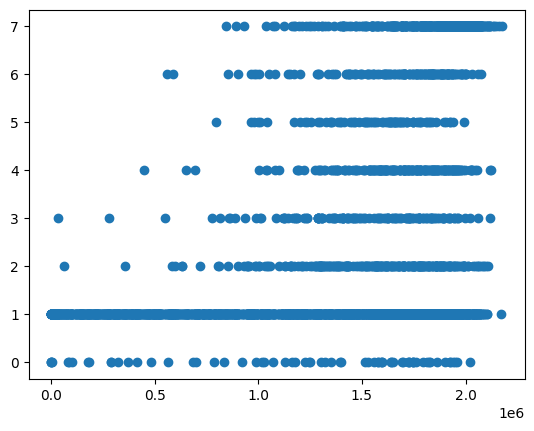

In [177]:
plt.scatter(edge_count, y_train)
plt.show()

In [189]:
edge_count.reshape(-1).shape

(3113,)

In [187]:
X_train_edge = X_train[edge_count.reshape(-1) < 800000]
y_train_edge = y_train[edge_count.reshape(-1) < 800000]


In [192]:
(y_train_edge == 1).mean()

0.9346642468239564